In [1]:
# imports
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/MSAI349/349_project/pass_run_pbp_2019.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
len(df)

32084

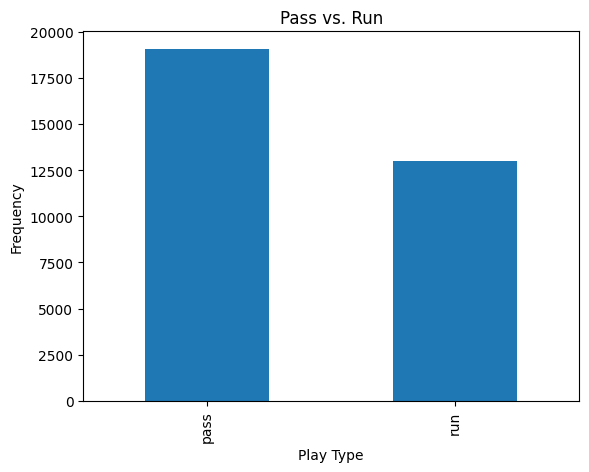

pass    19063
run     13021
Name: play_type, dtype: int64

In [6]:
# number of pass plays versus run plays
df['play_type'].value_counts().plot(kind='bar')
plt.xlabel('Play Type')
plt.ylabel('Frequency')
plt.title('Pass vs. Run')
plt.show()
df['play_type'].value_counts()

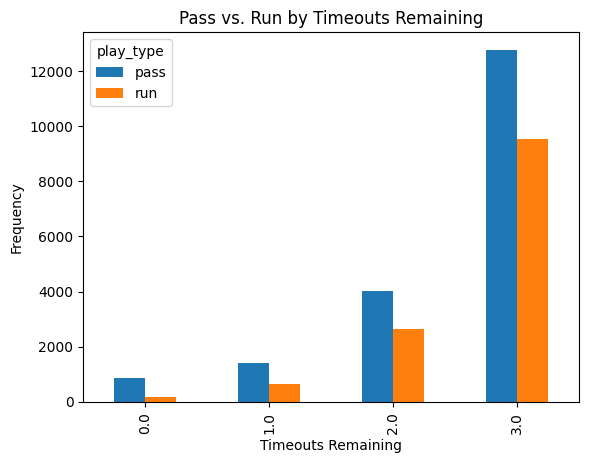

In [ ]:
# pass vs. run with different numbers of timeouts
timeout_type_df = df.groupby(['posteam_timeouts_remaining', 'play_type']).count()
timeout_type_df = timeout_type_df.reset_index()
pivot_df = timeout_type_df.pivot(index='posteam_timeouts_remaining', columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Timeouts Remaining')
plt.title('Pass vs. Run by Timeouts Remaining')
plt.show()

In [ ]:
# add column to get teams that are winning
df['winning'] = (df['score_differential'] > 0).astype(int)

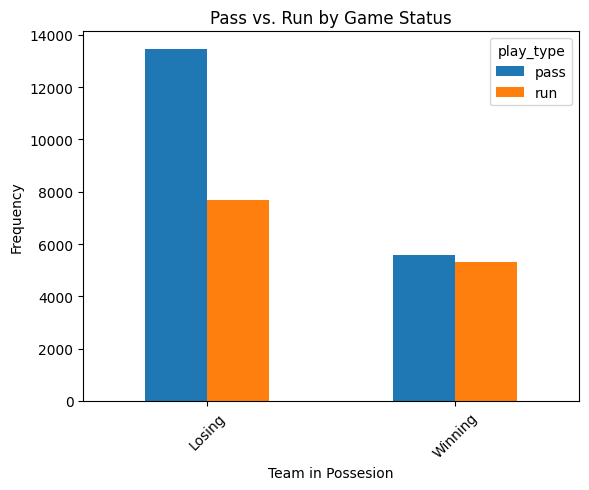

In [ ]:
# pass vs. run by if the team was winning or losing
winning_df = df.groupby(['winning', 'play_type']).count()
winning_df = winning_df.reset_index()
pivot_df = winning_df.pivot(index='winning', columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Team in Possesion')
plt.xticks(ticks=[0,1], labels=['Losing', 'Winning'], rotation=45)
plt.title('Pass vs. Run by Game Status')
plt.show()

In [ ]:
# add division to dataset

# Define divisions
afc_east = ['MIA', 'BUF', 'NYJ', 'NE']
afc_west = ['KC', 'DEN', 'OAK', 'LAC']
afc_north = ['BAL', 'CLE', 'CIN', 'PIT']
afc_south = ['JAX', 'HOU', 'IND', 'TEN']
nfc_east = ['DAL', 'PHI', 'NYG', 'WAS']
nfc_west = ['LA', 'SF', 'SEA', 'ARI']
nfc_north = ['MIN', 'GB', 'DET', 'CHI']
nfc_south = ['ATL', 'TB', 'CAR', 'NO']


# Function to categorize rows
def categorize_row_div(value):
    if value in afc_east:
        return 'AFC East'
    elif value in afc_west:
        return 'AFC West'
    elif value in afc_north:
        return 'AFC North'
    elif value in afc_south:
        return 'AFC South'
    elif value in nfc_east:
        return 'NFC East'
    elif value in nfc_west:
        return 'NFC West'
    elif value in nfc_north:
        return 'NFC North'
    elif value in nfc_south:
        return 'NFC South'
    else:
        return 'Other'

# Apply function to create a new column
df['posteam_div'] = df['posteam'].apply(categorize_row_div)

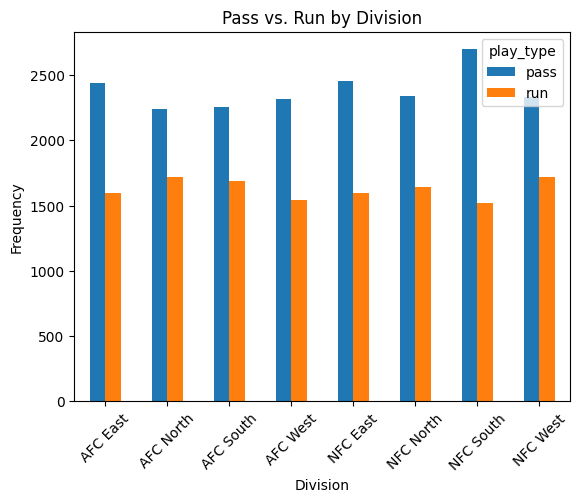

In [ ]:
# pass vs. run by division
div_df = df.groupby(['posteam_div', 'play_type']).count()
div_df = div_df.reset_index()
pivot_df = div_df.pivot(index='posteam_div', columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Division')
plt.xticks(rotation=45)
plt.title('Pass vs. Run by Division')
plt.show()

In [ ]:
# add division to dataset

# Define divisions
afc = ['MIA', 'BUF', 'NYJ', 'NE', 'KC', 'DEN', 'OAK', 'LAC', 'BAL', 'CLE', 'CIN', 'PIT', 'JAX', 'HOU', 'IND', 'TEN']
nfc = ['DAL', 'PHI', 'NYG', 'WAS', 'LA', 'SF', 'SEA', 'ARI', 'MIN', 'GB', 'DET', 'CHI', 'ATL', 'TB', 'CAR', 'NO']


# Function to categorize rows
def categorize_row_conf(value):
    if value in afc:
        return 'AFC'
    elif value in nfc:
        return 'NFC'
    else:
        return 'Other'

# Apply function to create a new column
df['posteam_conf'] = df['posteam'].apply(categorize_row_conf)

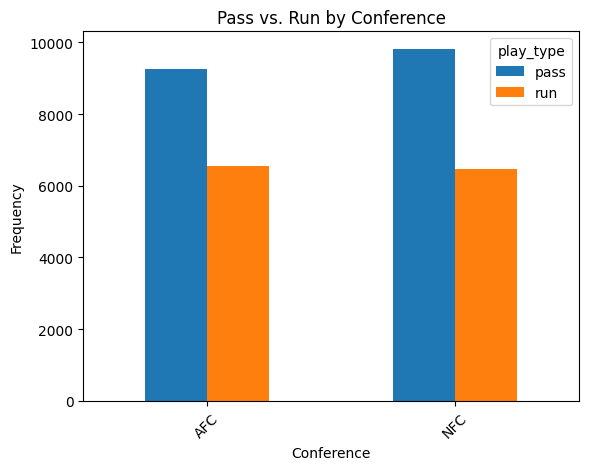

In [ ]:
# pass vs. run by conference
conf_df = df.groupby(['posteam_conf', 'play_type']).count()
conf_df = conf_df.reset_index()
pivot_df = conf_df.pivot(index='posteam_conf', columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Conference')
plt.xticks(rotation=45)
plt.title('Pass vs. Run by Conference')
plt.show()

In [ ]:
# add column to get teams that are in the 2-min drill
df['two_min_drill'] = (df['half_seconds_remaining'] <= 120).astype(int)

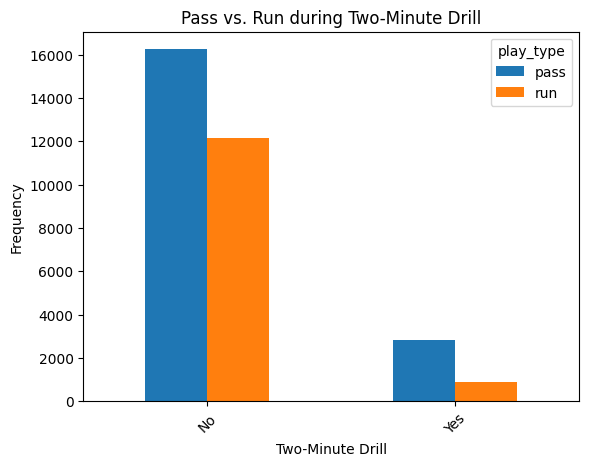

In [ ]:
# pass vs. run by if the team is in the two-min drill
two_min_df = df.groupby(['two_min_drill', 'play_type']).count()
two_min_df = two_min_df.reset_index()
pivot_df = two_min_df.pivot(index='two_min_drill', columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Two-Minute Drill')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=45)
plt.title('Pass vs. Run during Two-Minute Drill')
plt.show()

In [ ]:
df.columns

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'drive', 'qtr', 'down',
       'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'play_type',
       'no_huddle', 'home_timeouts_remaining', 'away_timeouts_remaining',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score',
       'defteam_score', 'score_differential', 'winning', 'posteam_div',
       'posteam_conf', 'two_min_drill'],
      dtype='object')

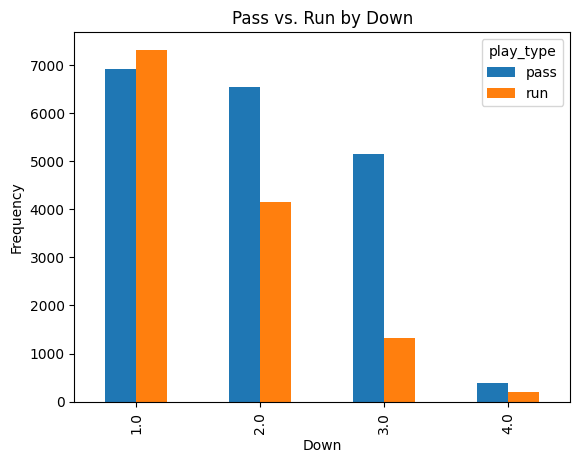

In [ ]:
# pass vs. run by down
down_df = df.groupby(['down', 'play_type']).count()
down_df = down_df.reset_index()
pivot_df = down_df.pivot(index='down', columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Down')
# plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=45)
plt.title('Pass vs. Run by Down')
plt.show()

In [ ]:
# add column to get teams that are in a long distance situation
df['long_distance'] = (df['ydstogo'] >= 6).astype(int)

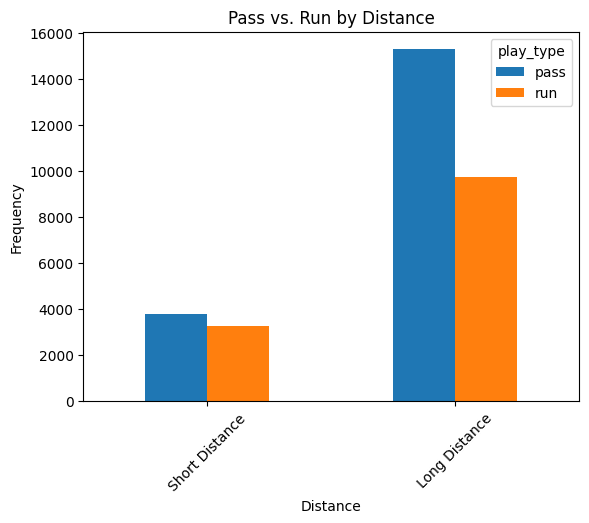

In [ ]:
# pass vs. run by distnace
down_df = df.groupby(['long_distance', 'play_type']).count()
down_df = down_df.reset_index()
pivot_df = down_df.pivot(index='long_distance', columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Distance')
plt.xticks(ticks=[0,1], labels=['Short Distance', 'Long Distance'], rotation=45)
plt.title('Pass vs. Run by Distance')
plt.show()

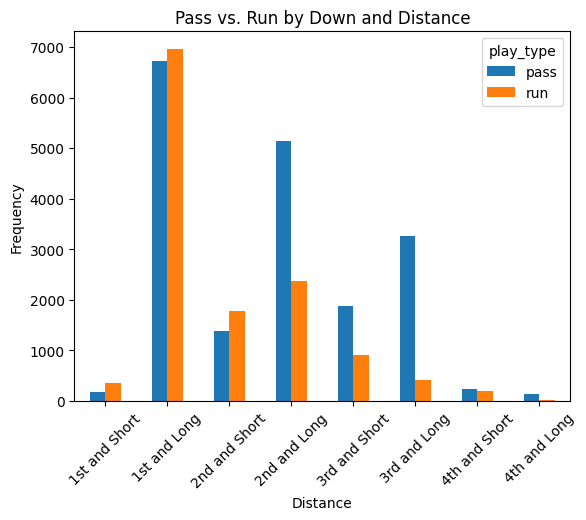

In [ ]:
# pass vs. run by down and distnace
down_df = df.groupby(['down', 'long_distance', 'play_type']).count()
down_df = down_df.reset_index()
pivot_df = down_df.pivot(index=['down', 'long_distance'], columns='play_type', values='play_id')
pivot_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Distance')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7],
           labels=['1st and Short', '1st and Long', '2nd and Short', '2nd and Long', '3rd and Short', '3rd and Long', '4th and Short', '4th and Long'],
           rotation=45)
plt.title('Pass vs. Run by Down and Distance')
plt.show()